In [1]:
from sklearn import datasets
from sklearn.decomposition import PCA

#### Dataset loading

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Dataset sample visualization

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_3d_graph(X):
    ax = plt.figure(figsize=(16, 12)).add_subplot(projection='3d')
    ax.scatter(xs=X[:, 0], ys=X[:, 1], zs=X[:, 2], zdir='y', label='Iris samples')
    ax.legend()
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_zlim(-10, 10)
    ax.set_xlabel(iris['feature_names'][0])
    ax.set_ylabel(iris['feature_names'][1])
    ax.set_zlabel(iris['feature_names'][2])
    plt.show()

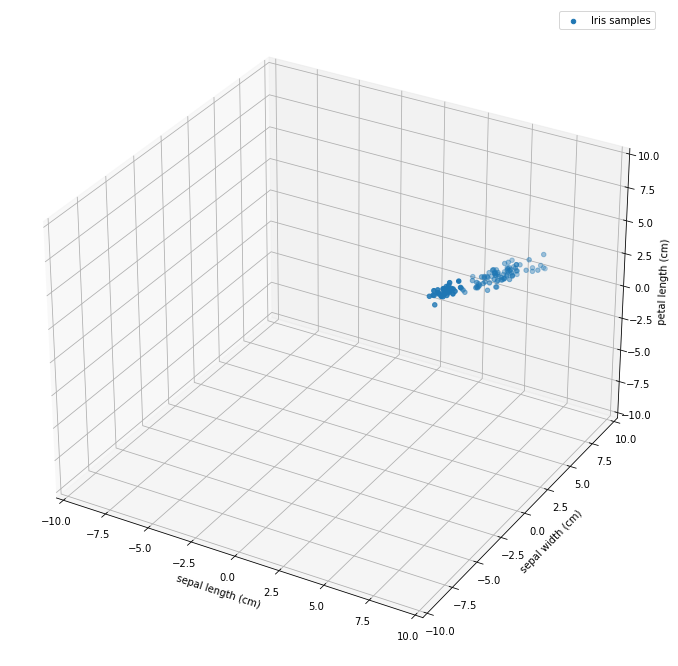

In [5]:
plot_3d_graph(X_train)

In [6]:
import numpy as np

number_of_examples = 10
Xy_samples = np.concatenate((X_train[:number_of_examples, :], np.expand_dims([yex for yex in y_train[:number_of_examples]], axis=1)), axis=1)
iris_df = pd.DataFrame(Xy_samples[:number_of_examples, :])
iris_df.columns = iris['feature_names'] + ["type"]
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,6.1,3.0,4.6,1.4,1.0
1,7.7,3.0,6.1,2.3,2.0
2,5.6,2.5,3.9,1.1,1.0
3,6.4,2.8,5.6,2.1,2.0
4,5.8,2.8,5.1,2.4,2.0
5,5.3,3.7,1.5,0.2,0.0
6,5.5,2.3,4.0,1.3,1.0
7,5.2,3.4,1.4,0.2,0.0
8,6.5,2.8,4.6,1.5,1.0
9,6.7,2.5,5.8,1.8,2.0


#### Data preprocessing

In [7]:
from sys import float_info
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
Xy_samples = np.concatenate((X_train_scaled[:number_of_examples, :], np.expand_dims([yex for yex in y_train[:number_of_examples]], axis=1)), axis=1)

iris_df = pd.DataFrame(Xy_samples[:number_of_examples, :])
iris_df.columns = iris['feature_names'] + ["type"]
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
0,0.315537,-0.045789,0.447675,0.233803,1.0
1,2.244933,-0.045789,1.297692,1.397429,2.0
2,-0.287400,-1.240281,0.051001,-0.154073,1.0
3,0.677298,-0.523586,1.014353,1.138845,2.0
4,-0.046225,-0.523586,0.731014,1.526721,2.0
5,-0.649161,1.626500,-1.309025,-1.317699,0.0
6,-0.407987,-1.718077,0.107669,0.104511,1.0
7,-0.769749,0.909805,-1.365693,-1.317699,0.0
8,0.797886,-0.523586,0.447675,0.363094,1.0
9,1.039060,-1.240281,1.127688,0.750970,2.0


In [8]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

onehot_encoder = OneHotEncoder(sparse=False)
y_train_encoded = onehot_encoder.fit_transform(y_train_encoded.reshape(-1, 1))
y_test_encoded = onehot_encoder.transform(y_test_encoded.reshape(-1, 1))

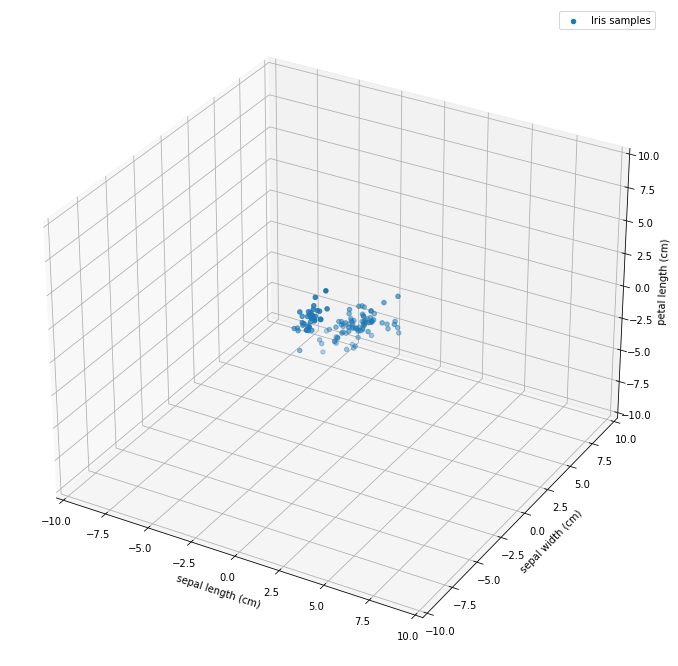

In [9]:
plot_3d_graph(X_train_scaled)

#### Training MLP

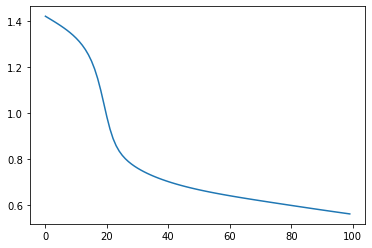

In [15]:
import nn
model = nn.MLP(nin=X_train_scaled.shape[1], nouts=[4, 4, len(iris.target_names)])
epochs = 100
losses = []
for epoch in range(epochs):
    # forward pass
    y_preds = [model(x) for x in X_train_scaled]
    y_preds = [[y_pred_i.exp() / np.sum([y_pred_j.exp() for y_pred_j in y_pred]) for y_pred_i in y_pred] for y_pred in y_preds]
    loss = [-np.sum(y_train_encoded_pred * np.log(y_pred)) for y_train_encoded_pred, y_pred in zip(y_train_encoded, y_preds)]
    loss = np.sum(loss) / len(loss)
    losses.append(loss)
    
    # backward pass
    for p in model.parameters():
        p.grad = 0.0
    loss.backward()

    # optimization
    for p in model.parameters():
        p.data += -1e-1 * p.grad

plt.plot(list(range(epochs)), [loss.data for loss in losses])